In [78]:
import pandas as pd

In [79]:
df = pd.read_csv('golf-dataset.csv')

In [80]:
df

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [81]:
X = df.drop('Play Golf', axis = 1)

In [82]:
y = df['Play Golf']

In [83]:
y.shape

(14,)

In [84]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
outlook = label.fit_transform(X.Outlook)

In [85]:
Temp = label.fit_transform(X.Temp)
Humidity = label.fit_transform(X.Humidity)
Windy = label.fit_transform(X.Windy)

In [86]:
X['outlook'] = outlook
X['temperature'] = Temp
X['Humidity_le'] = Humidity
X['Windy_le'] = Windy

In [87]:
X

,Outlook,Temp,Humidity,Windy,outlook,temperature,Humidity_le,Windy_le
0,Rainy,Hot,High,False,1,1,0,0
1,Rainy,Hot,High,True,1,1,0,1
2,Overcast,Hot,High,False,0,1,0,0
3,Sunny,Mild,High,False,2,2,0,0
4,Sunny,Cool,Normal,False,2,0,1,0
5,Sunny,Cool,Normal,True,2,0,1,1
6,Overcast,Cool,Normal,True,0,0,1,1
7,Rainy,Mild,High,False,1,2,0,0
8,Rainy,Cool,Normal,False,1,0,1,0
9,Sunny,Mild,Normal,False,2,2,1,0


In [88]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')

In [89]:
X.drop(['Outlook', 'Temp', 'Humidity', 'Windy'], axis=1, inplace=True)

In [90]:
X

,outlook,temperature,Humidity_le,Windy_le
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0
5,2,0,1,1
6,0,0,1,1
7,1,2,0,0
8,1,0,1,0
9,2,2,1,0


In [91]:
model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(111.60000000000001, 195.696, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(74.4, 152.208, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(148.8, 152.208, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(74.4, 108.72, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(37.2, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(111.60000000000001, 65.232, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(74.4, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(148.8, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(223.20000000000002, 108.72, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(186.0, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(260.40000000000003, 65.232, 'X[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(223.20000000000002, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(297.6, 21.744, 'entropy = 0.0

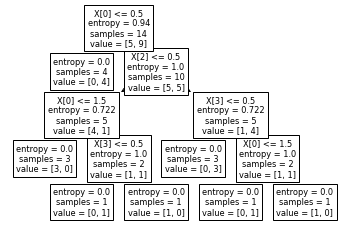

In [92]:
from sklearn.tree import plot_tree
plot_tree(model)

In [93]:
model.apply(X)

array([ 4,  4,  1,  6,  9, 12,  1,  4,  9,  9, 11,  1,  1,  7],
      dtype=int64)

In [94]:
model.decision_path(X)

<14x13 sparse matrix of type '<class 'numpy.int64'>'
	with 52 stored elements in Compressed Sparse Row format>

In [95]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

Source ~ https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc

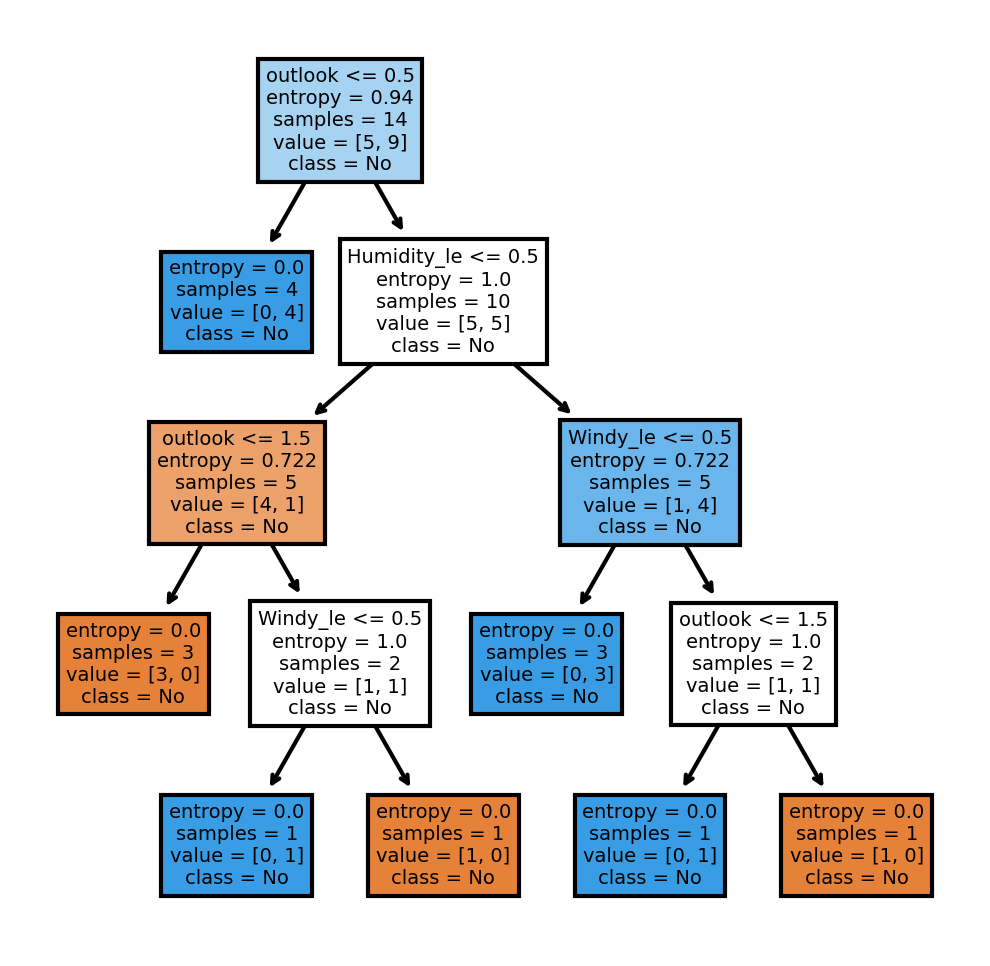

In [96]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(model,
               feature_names = X.columns, 
               class_names=y.values,
               filled = True);
fig.savefig('imagename.png')